In [8]:
from math import *
import numpy as np
import sympy as sy
from sympy import integrate

mm=0.001

重点知识
---
1. 计算转动惯量
$$
I_z=\int_{x_1}^{x_2}{\rho \cdot x^2}
$$  
2. **计算正应力**(***注意负号,M是内力矩根据M-x图像看,正值为tension，负值为compression***)
$$
\sigma=\frac{-My}{I_z} 
$$
3. 圆的转动惯量  
$$
y=\sqrt{r^2-x^2}  
$$
$$
I=\int_{-r}^{r}{2 \cdot y \cdot x^2}
$$
  
4. $\sigma_{}$ 是拉伸还是压缩 ⭐⭐
5. V-x图力的加减与图中方向一致，上加下减
6. M-x图力矩加减与图中方向相反

重点题目
---
T1-T6  受力分析  
T7-T11 计算质心 $\bar{y}$ or 转动惯量 $I_z$  
T12   综合题
1. T1
2. T9  注意计算max σ
3. T10 注意ybar可能是负的
4. T12 阴间题

In [2]:
r=1
x=sy.S('x')
y=(r**2-x**2)**0.5

float(integrate(2*y*x*x,[x,-r,r]))

0.7853981633974483

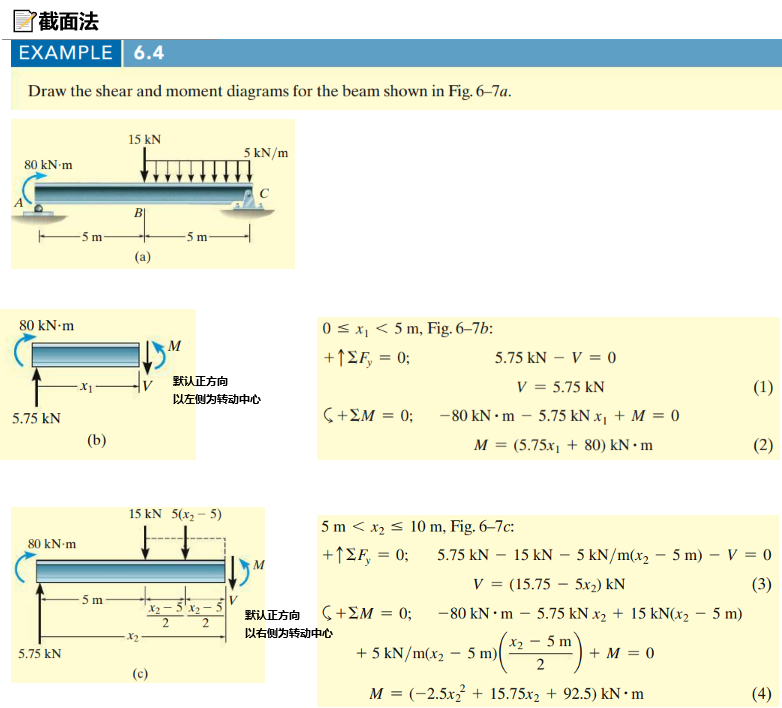

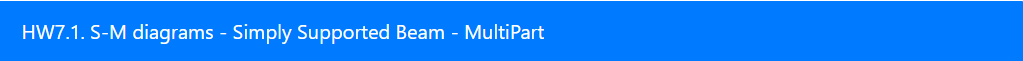

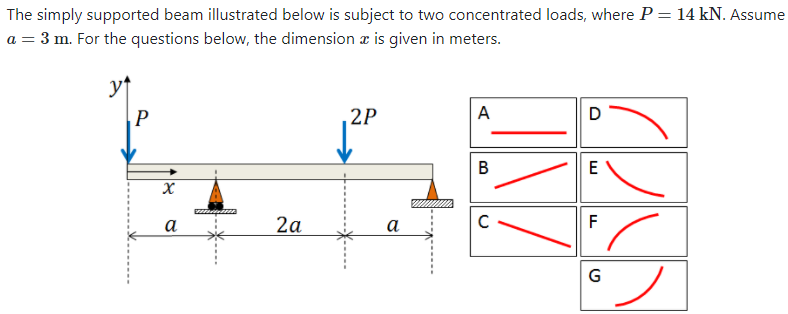

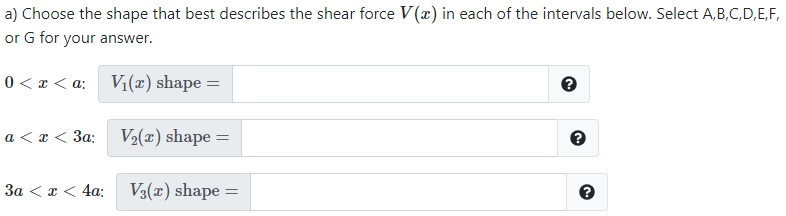

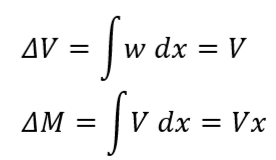

In [12]:
P = 13 # kN
a = 4 # m

###################复制部分
p=P

f1=-p
f2=f1+2*p
f3=f2-2*p
f4=f3+p
m0=0
m1=p*a*-1 ###!!!!!!!!!!!!!
m2=p*a    ###!!!!!!!!!!!!!
m3=0

print('A')
print('A')
print('A')

print('V0+ ',f1)
print('Va- ',f1)
print('Va+ ',f2)
print('V3a-',f2)
print('V3a+',f3)
print('V4a-',f3)

print('C')
print('B')
print('C')

print('M0+ ',m0)
print('Ma- ',m1)
print('Ma+ ',m1)
print('M3a-',m2)
print('M3a+',m2)
print('M4a-',m3)

A
A
A
V0+  -13
Va-  -13
Va+  13
V3a- 13
V3a+ -13
V4a- -13
C
B
C
M0+  0
Ma-  -52
Ma+  -52
M3a- 52
M3a+ 52
M4a- 0


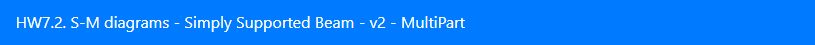

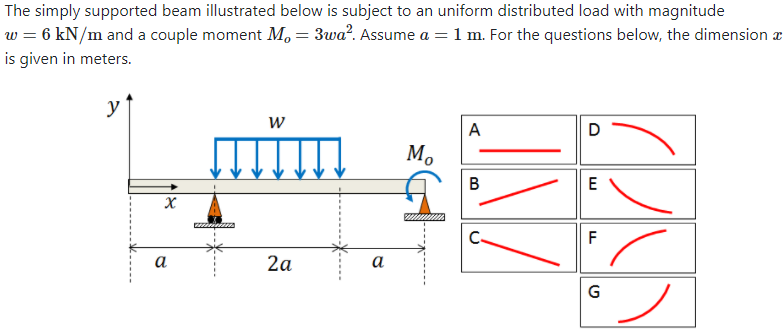

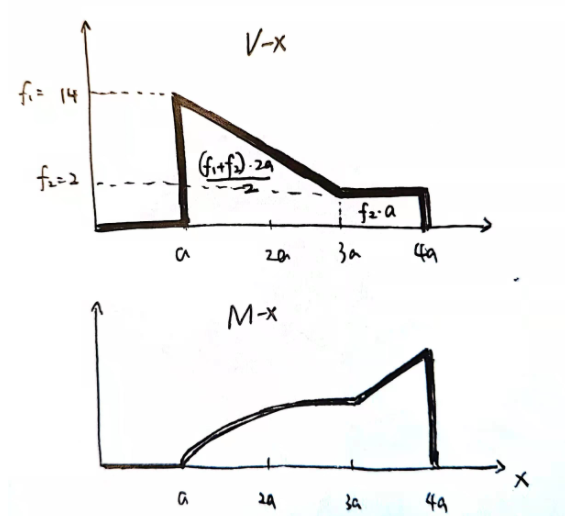

In [4]:
w = 11 # kN/m
a = 3 # m

Feq=2*a*w
m=3*w*a*a

f0=0
f1=(2*a*Feq+m)/a/3  #以右侧支点作为转动点
f2=f1-Feq
f3=0

m4=0
m3=m4+m
m2=m3-f2*a
m1=m2-(f2+f1)*2*a*0.5
m0=m1

print('A','C','A')
print('V0+ ',f0)
print('Va- ',f0)
print('Va+ ',f1)
print('V3a-',f2)
print('V3a+',f2)
print('V4a-',f2)
print('A','F','B')
print('M0+ ',m0)
print('Ma- ',m1)
print('Ma+ ',m1)
print('M3a-',m2)
print('M3a+',m2)
print('M4a-',m3)

A C A
V0+  0
Va-  0
Va+  77.0
V3a- 11.0
V3a+ 11.0
V4a- 11.0
A F B
M0+  0.0
Ma-  0.0
Ma+  0.0
M3a- 264.0
M3a+ 264.0
M4a- 297


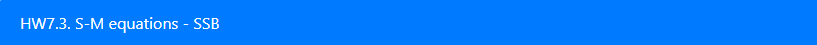

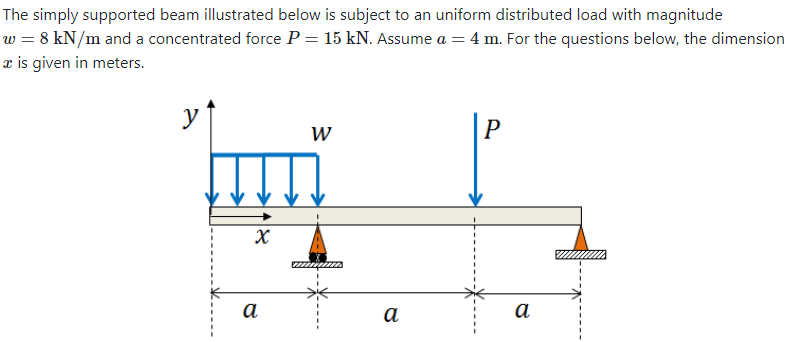

In [5]:
w = 6 # kN/m
P = 4 # kN
a = 2 # m

feq=w*a
req=2.5*a

fsupport1=(feq*req+P*a)/2/a
fsupport2=(-feq-P+fsupport1)*-1

V0=0
V1=-w*a
V2=V1+fsupport1
V3=V2-P
V4=V3+fsupport2

m0=0
m1=m0+V1*a*0.5
m2=m1+V2*a
m3=m2+V3*a

print('0<x<a')
print('V1=',V0,'+',-w,'x')
print('M1=',m0,'+', 0,'x','+',-0.5*w,'x2')

print('a<x<2a')
print('V1=',V2,'+',0,'x')
print('M1=',m1-a*V2,'+', V2,'x','+',0,'x2')    #注意m1-a*V2，因为是从a开始的，所以要减掉V2*a!!!!!!!!!!!!!

print('2a<x<3a')
print('V1=',V3,'+',0,'x')
print('M1=',m2-2*a*V3,'+', V3,'x','+',0,'x2')  #注意m2-2*a*V3，因为是从2a开始的，所以要减掉V3*2a!!!!!!!!!!!!!

0<x<a
V1= 0 + -6 x
M1= 0 + 0 x + -3.0 x2
a<x<2a
V1= 5.0 + 0 x
M1= -22.0 + 5.0 x + 0 x2
2a<x<3a
V1= 1.0 + 0 x
M1= -6.0 + 1.0 x + 0 x2


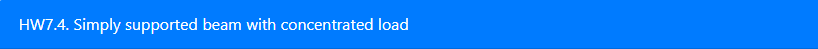

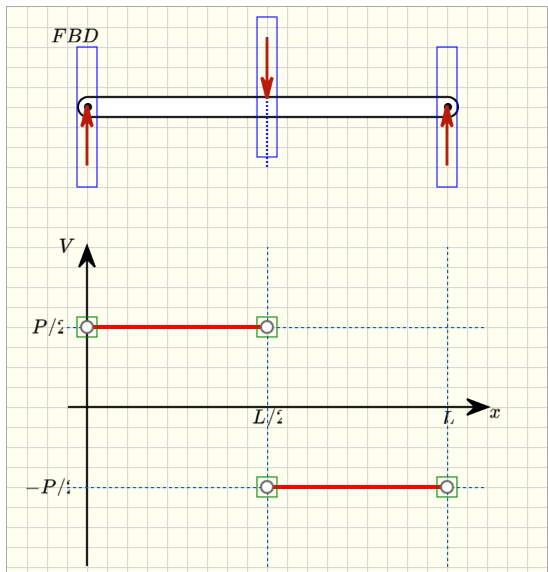

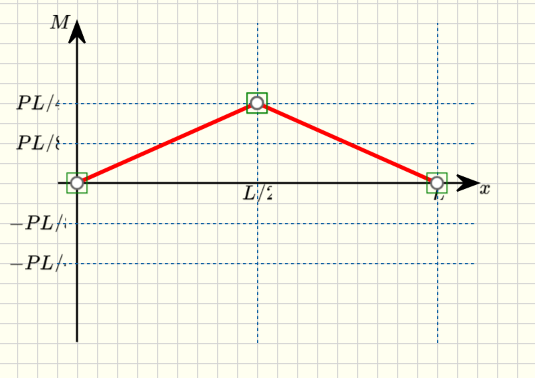

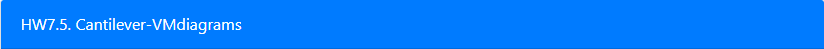

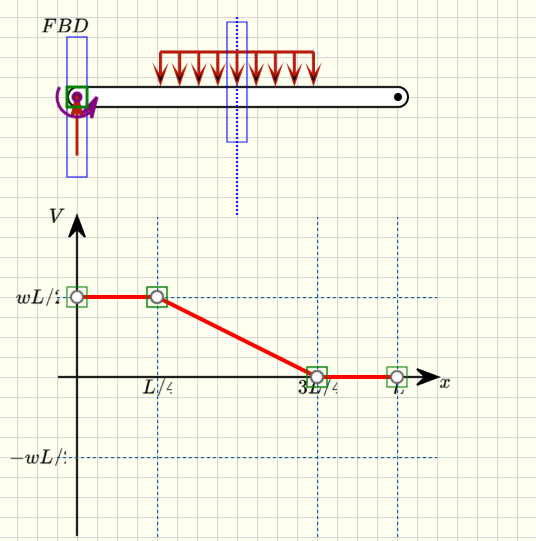

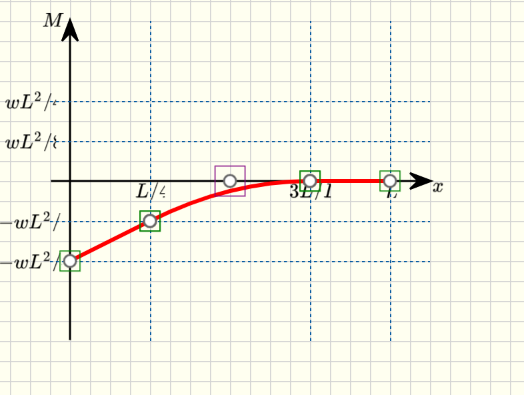

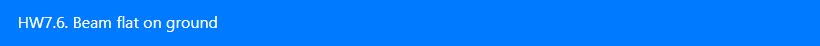

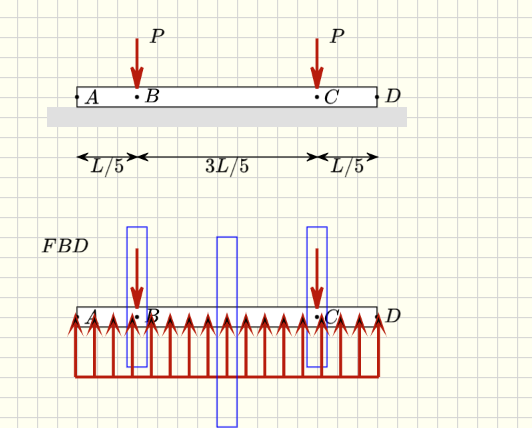

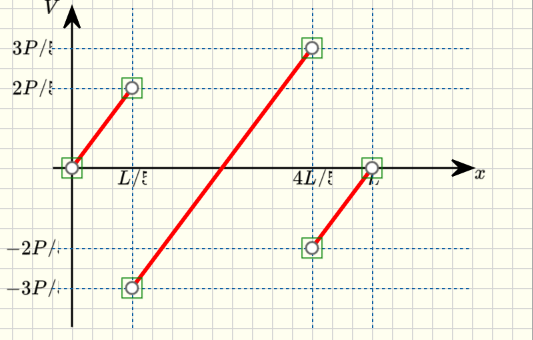

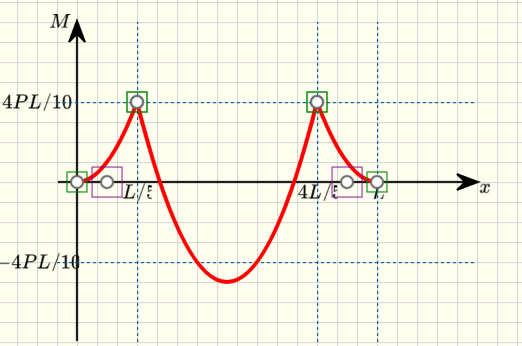

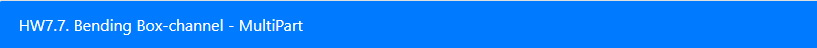

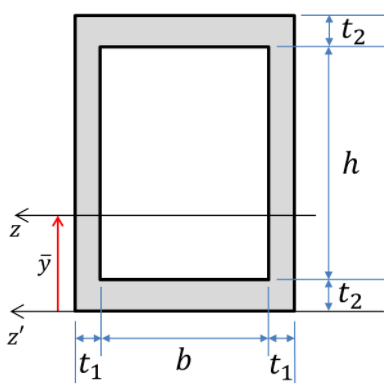

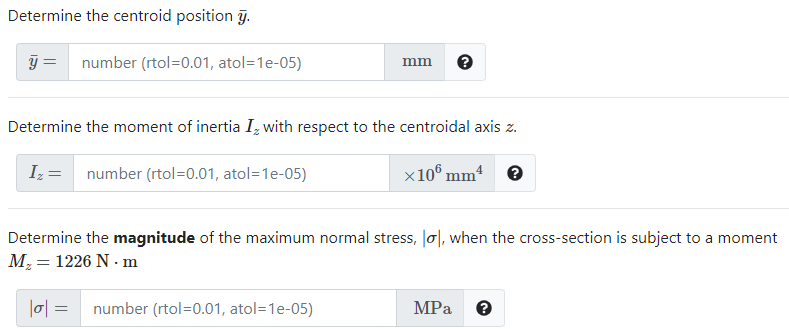

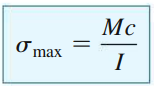

In [7]:
from sympy import *

h = 159e-3# mm
b = 233e-3 # mm
t1 = 20e-3 # mm
t2 = 24e-3 # mm
Mz = 1311 # N.m


y1=t2+0.5*h
y2=0.5*t2

m1=t1*(2*t2+h)
m2=b*t2

ybar=(m1*y1*2+m2*y2+m2*(y2+h+t2))/(2*m1+2*m2)

ro1=m1/(h+t2+t2)
ro2=m2/t2

#直接通过积分算转动惯量
r=S('r')
I11=integrate(ro1*r*r,[r,0,ybar])*2
I12=integrate(ro1*r*r,[r,0,2*t2+h-ybar])*2
I21=integrate(ro2*r*r,[r,ybar-t2,ybar])
I22=integrate(ro2*r*r,[r,t2+h-ybar,2*t2+h-ybar])

I=I11+I12+I21+I22

sigma=Mz*(t2+h+t2-ybar)/I

print(ybar/1e-3)
print(I/1e-3**4/1000000)
print(sigma/1000000)

103.49999999999999
123.737886000000
1.09658007249291


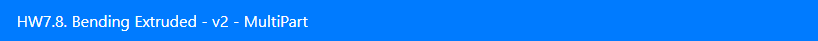

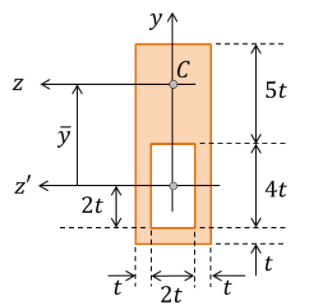

In [9]:
t = 16 # mm
Mz = -1591 # N.m

#单位转化
t*=mm

m1=10*t*4*t
m2=-2*t*4*t

y1=5*t
y2=3*t

zbar=(y1*m1+y2*m2)/(m1+m2)
ybar=zbar-3*t

r=sy.S('r')
ro1=m1/10/t
ro2=m2/4/t

I1=sy.integrate(ro1*r*r,[r,0,10*t-zbar])+sy.integrate(ro1*r*r,[r,0,zbar])
I2=sy.integrate(ro2*r*r,[r,zbar-5*t,zbar-t])
I=(I1+I2)

sigma=abs(Mz*zbar)/I

print(ybar/mm)
print(I/mm**4/1000000)
print(sigma/1000000)

39.99999999999999
18.5248426666667
7.55785096366450


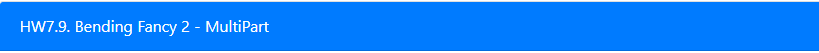

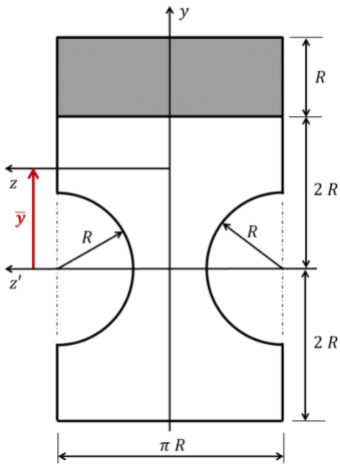

In [8]:
R = 26 # mm
Mz = 1789 # N.m

r=R*mm

m1=pi*r*r
m2=pi*r*2*r
m3=pi*r**2

y1=4.5*r
y2=2*r
y3=2*r

zbar=(m1*y1+m2*y2+m3*y3)/(m1+m2+m3)
ybar=zbar-2*r

ro1=m1/r
ro2=pi*r
x,y=sy.S('x,y')
y=(r**2-(x)**2)**0.5  #计算用圆的转动惯量
I1=integrate(ro1*x*x,[x,2*r-ybar,3*r-ybar])
I2=integrate(ro2*x*x,[x,-2*r-ybar,2*r-ybar])
I3=integrate(2*y*x*x,[x,-r,r]) #这里使用到了y计算圆的转动惯量
I3=float(I3)+pi*r*r*ybar**2
I=I1+I2-I3

sigma1=Mz*zbar/I
sigma2=-Mz*(r*5-zbar)/I
sigma=abs(max(sigma1,sigma2))  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!注意向上的是-向下的是+

print(ybar/mm)
print(I/mm**4/1000000)
print(sigma/1000000)

16.25
14.1469613798504
8.63077566422896


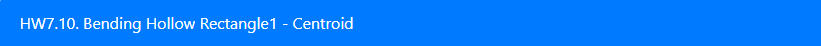

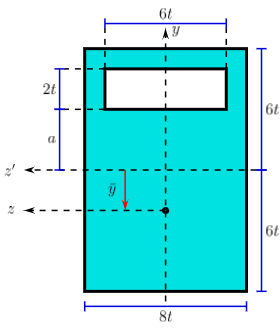

In [9]:
t = 17 # mm
a = 66 # mm

t*=mm
a*=mm

m1=8*t*12*t
m2=-2*t*6*t

ro1=m1/12/t
ro2=m2/2/t

y1=6*t
y2=6*t+a+t

zbar=(m1*y1+m2*y2)/(m1+m2)
ybar=-6*t+zbar

print(ybar/mm)  #注意ybar可能是负的

-11.857142857142858


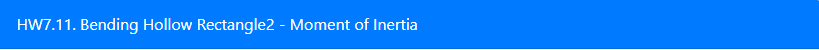

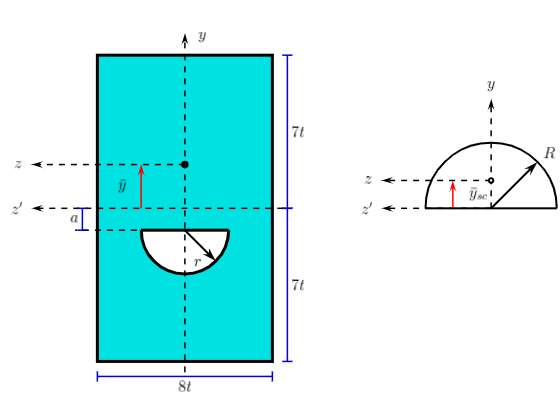

In [10]:
t = 20 # mm
a = 20 # mm
r = 60 # mm
ybar = -6.5678 # mm
#单位转化
t*=mm;a*=mm;r*=mm;ybar*=mm

m1=14*t*8*t
m2=pi*r*r*0.5

y1=7*t
y2=7*t-a-(4*r/3/pi)

zbar=(m1*y1-m2*y2)/(m1-m2)

x=sy.S('x')
i1=integrate(8*t*x*x,[x,-7*t-ybar,7*t-ybar])
i2=-((pi/8-8/(9*pi))*r**4+m2*(zbar-y2)**2)
i=i1+i2
print(i/mm**4/1000000)

277.893444165568


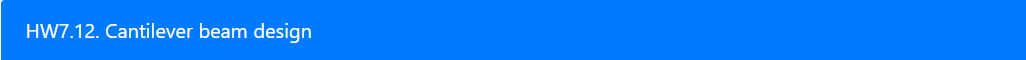

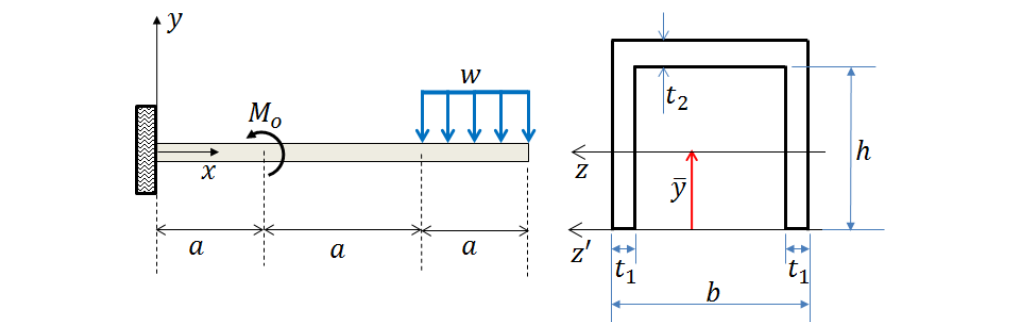

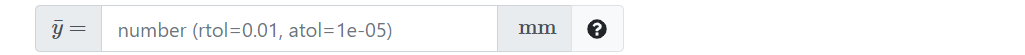

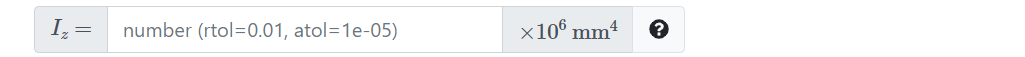

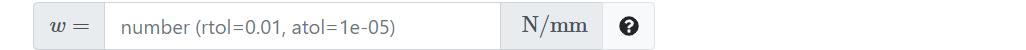

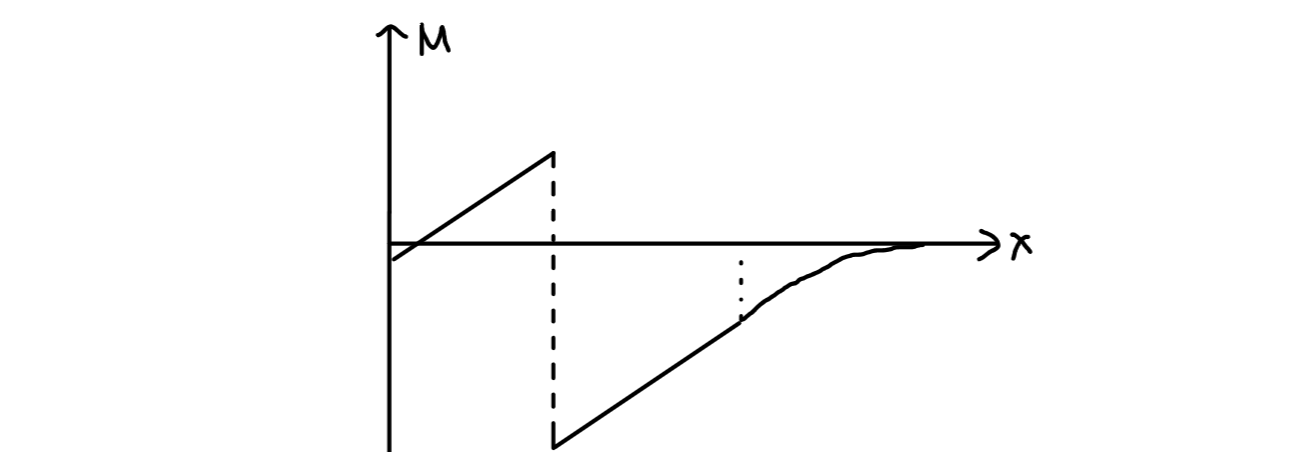

In [22]:
####################复制部分
a = 1543 # mm
b = 249 # mm
h = 160 # mm
t1 = 23 # mm
t2 = 22 # mm
sigmaT = 14 # MPa
sigmaC = 13 # MPa
####################单位转化
a*=mm;b*=mm;h*=mm;t1*=mm;t2*=mm;sigmaT*=1e6;sigmaC*=1e6

x,w=sy.S('x,w')

#计算质心
m1=2*t1*h
m2=t2*b
y1=0.5*h
y2=0.5*t2+h
ybar=(m1*y1+m2*y2)/(m1+m2)

#计算转动惯量
I1=integrate(2*t1*x*x,[x,-ybar,h-ybar])
I2=integrate(b*x*x,[x,h-ybar,h+t2-ybar])
I=I1+I2

#计算力矩
M1=2*w*a*a
Feq=w*a
Req=2.5*a
M0=Feq*Req-M1

M_up=-M0+a*Feq
M_down=-M0+a*Feq-M1

sigma_左_压=-M_up*(h-ybar)/I   #左上=压
sigma_左_拉=-M_up*(-ybar)/I    #左下=拉
sigma_右_拉=-M_down*(h-ybar)/I #右上=拉
sigma_右_压=-M_down*(-ybar)/I  #右下=压

equ1=sigma_左_压-sigmaC
equ2=sigma_左_拉-sigmaT

equ3=sigma_右_拉-sigmaT
equ4=sigma_右_压-sigmaC  #这一条式子

w1=-sy.solve([equ1],[w])[w]
w2=sy.solve([equ2],[w])[w]
w3=sy.solve([equ3],[w])[w]
w4=-sy.solve([equ4],[w])[w]
w=min(w1,w2,w3,w4)*mm 


ybar/mm,I/mm**4/1e6,w,w1,w2,w3,w4

(118.8298800436205,
 41.9289797913486,
 1.28442537766741,
 11121.7635786521,
 4149.68198938699,
 3992.42795131100,
 1284.42537766741)

$\omega$ 选的是最小的
---